In [113]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv("F:\Dataset\creditcard.csv\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [114]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [115]:
df.isnull().sum().max()

0

In [116]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [117]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

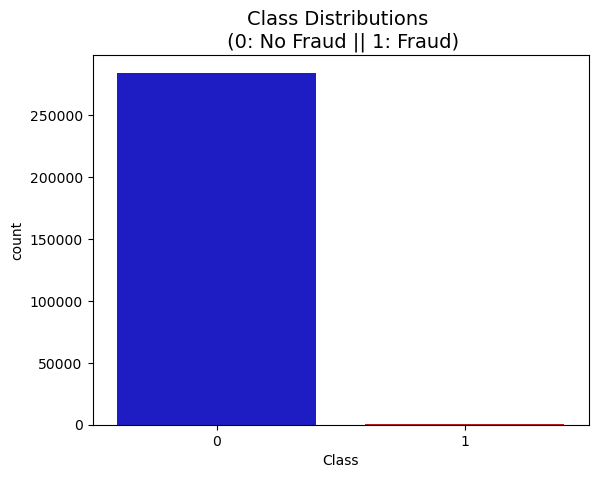

In [118]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

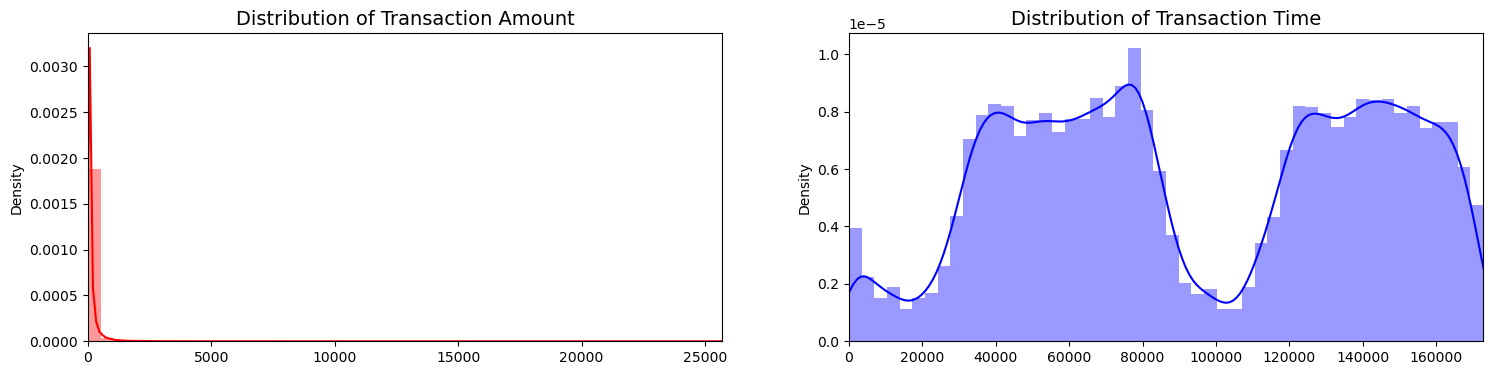

In [119]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])



plt.show()

In [120]:
# Since most of our data has already been scaled we should scale the columns that are left to scale (Amount and Time)
from sklearn.preprocessing import StandardScaler, RobustScaler

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)


In [121]:
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [122]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

No Frauds 99.83 % of the dataset
Frauds 0.17 % of the dataset
Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99827076 0.00172924]
[0.99827952 0.00172048]


In [123]:
df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
104113,1.760637,-0.185364,0.977472,-0.753210,0.796378,0.240363,-1.024678,-0.039073,-0.421011,0.001458,...,0.274661,-0.172567,-0.509600,-0.114513,-0.010897,0.179087,0.956032,-0.055268,0.035291,0
123201,-0.293440,-0.092189,1.141572,1.291195,-1.432900,2.058202,0.940824,-0.958274,0.391154,-0.092519,...,-0.005913,-0.366507,-0.714465,-0.143911,-0.305178,0.697514,-0.312545,0.106247,0.125060,1
270193,0.290785,0.931214,2.050839,0.305606,-2.585837,0.466915,1.020922,-1.252949,0.875698,-0.559349,...,0.000524,0.061997,0.342931,-0.082085,0.686485,0.447841,0.675772,-0.101944,-0.042819,0
244004,-0.293440,0.792690,-4.673231,4.195976,-8.392423,7.743215,-1.138803,-2.094899,-3.839487,0.543053,...,-0.180279,0.554185,0.656076,0.482417,-0.624399,-0.296289,0.374802,-2.678544,0.412368,1
27627,-0.042479,-0.588094,0.333499,1.699873,-2.596561,3.643945,-0.585068,-0.654659,-2.275789,0.675229,...,0.329342,0.469212,-0.144363,-0.317981,-0.769644,0.807855,0.228164,0.551002,0.305473,1


Distribution of the Classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


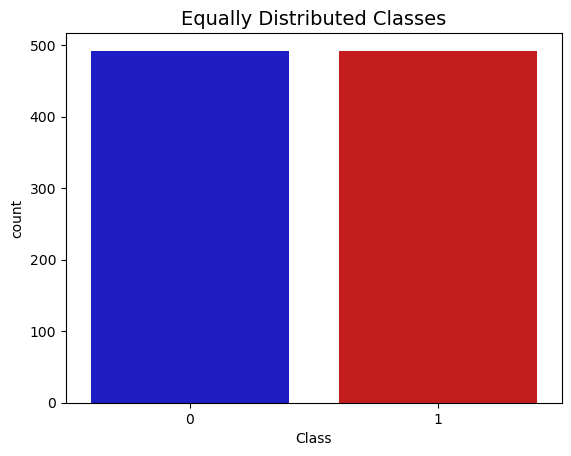

In [124]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

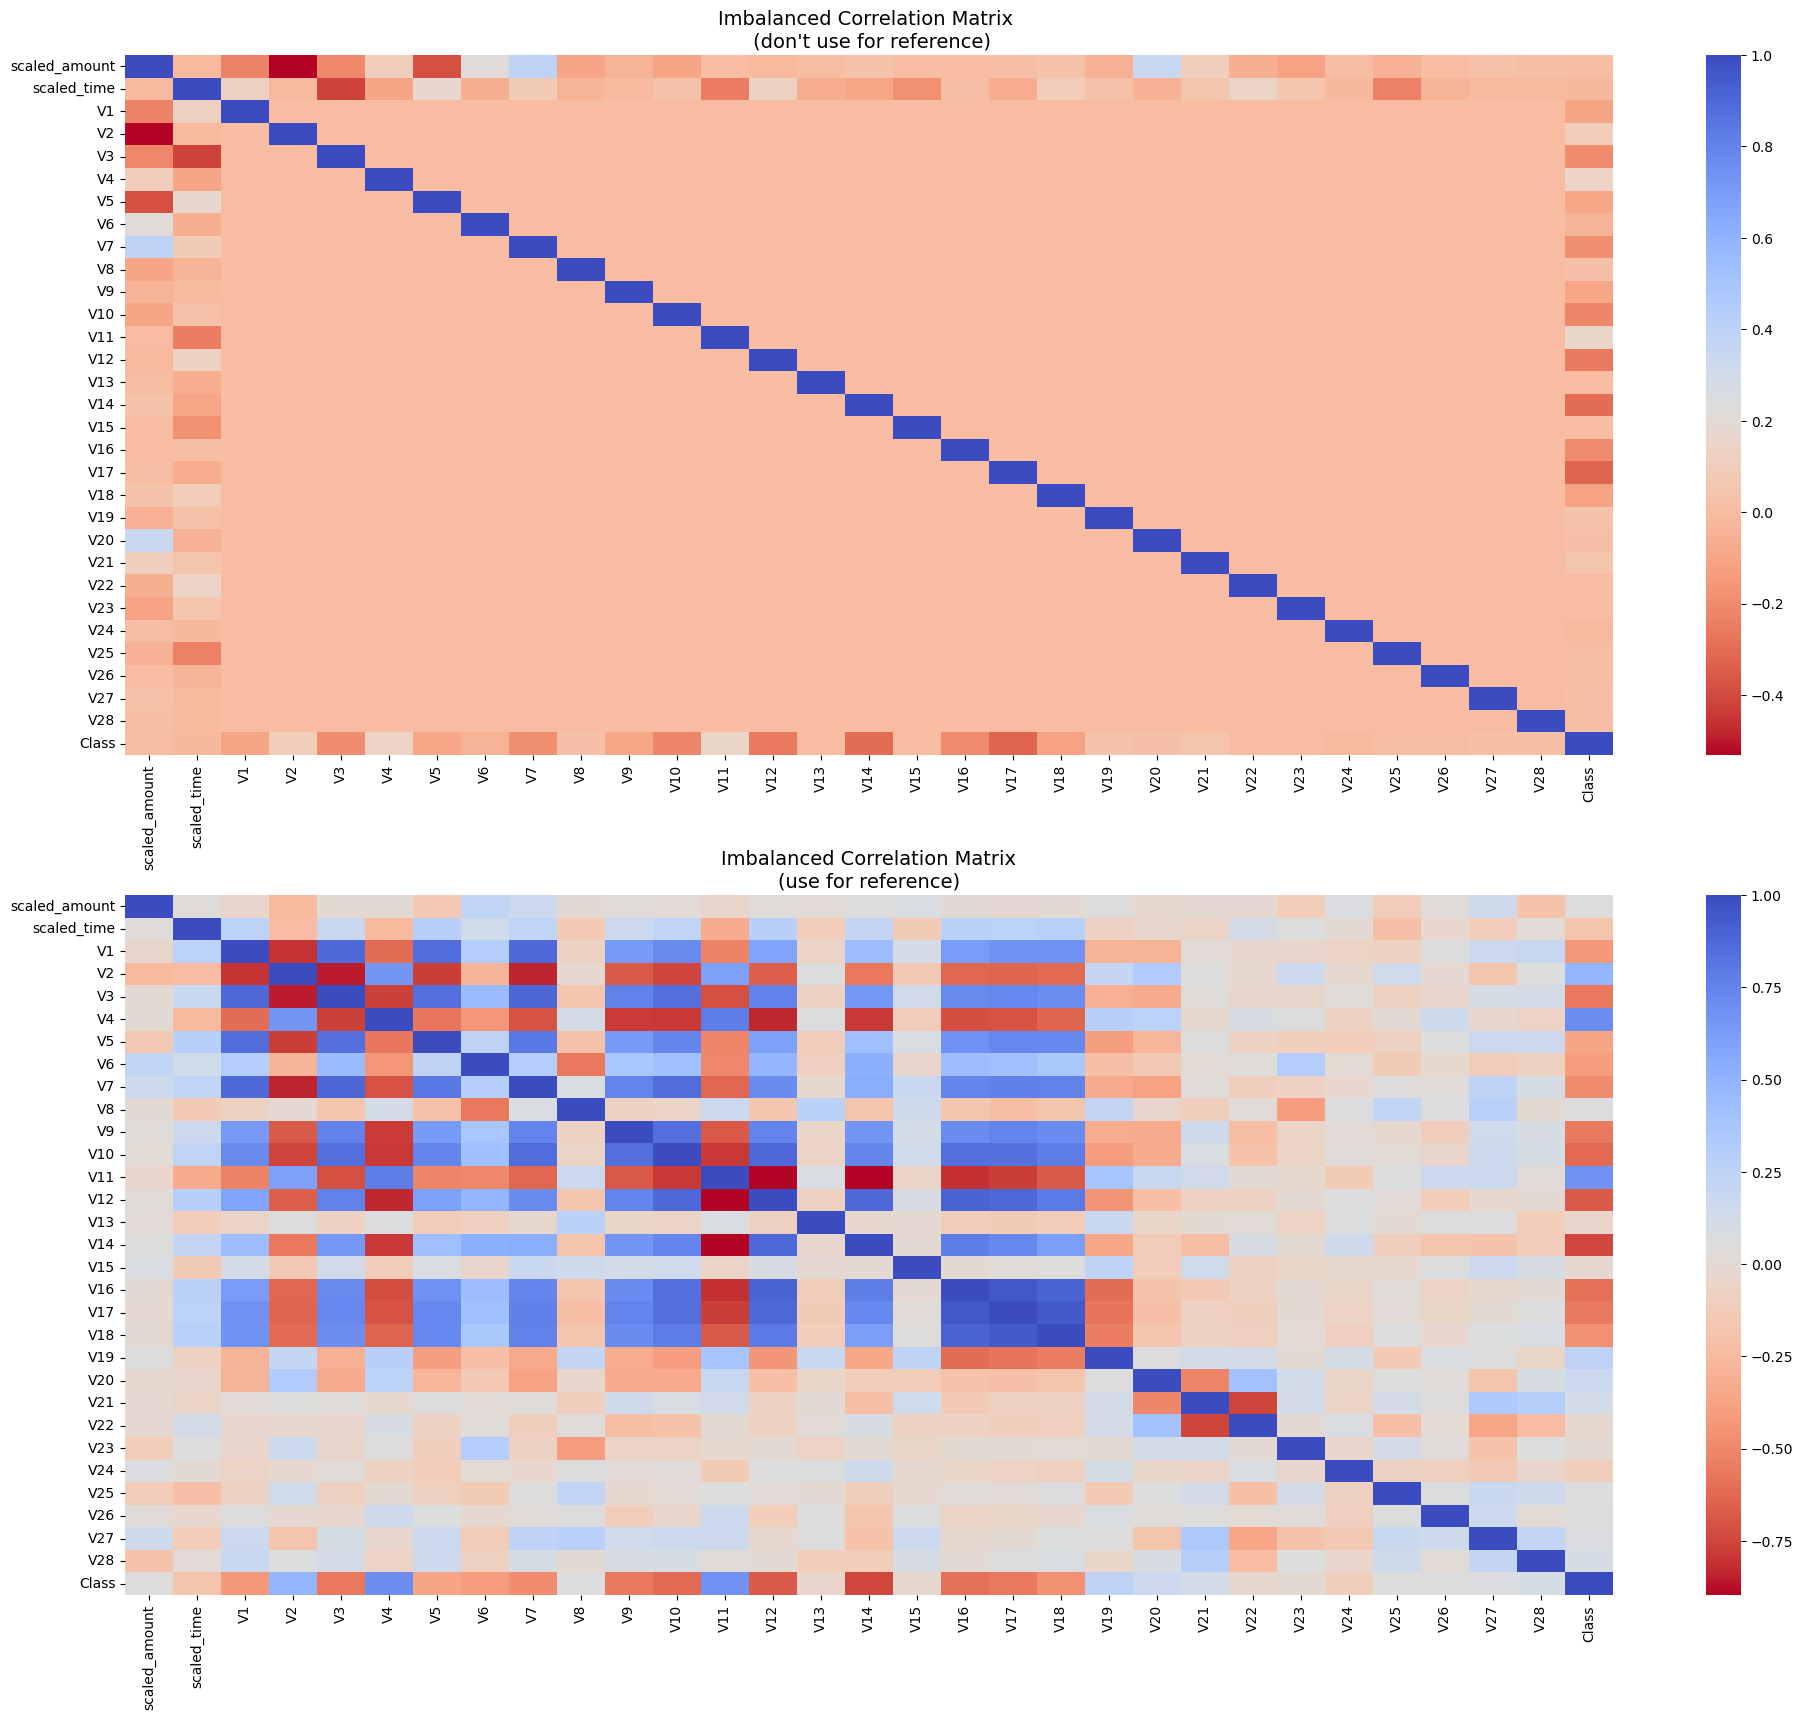

In [125]:
#correlation Matrix
f, (ax1, ax2) = plt.subplots(2,1, figsize=(24, 20))

corr = df.corr()
sns.heatmap(corr, cmap = 'coolwarm_r', annot_kws={'size': 20}, ax = ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)

sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap = 'coolwarm_r', annot_kws={'size': 20}, ax = ax2)
ax2.set_title("Imbalanced Correlation Matrix\n(use for reference)", fontsize=14)

plt.show()

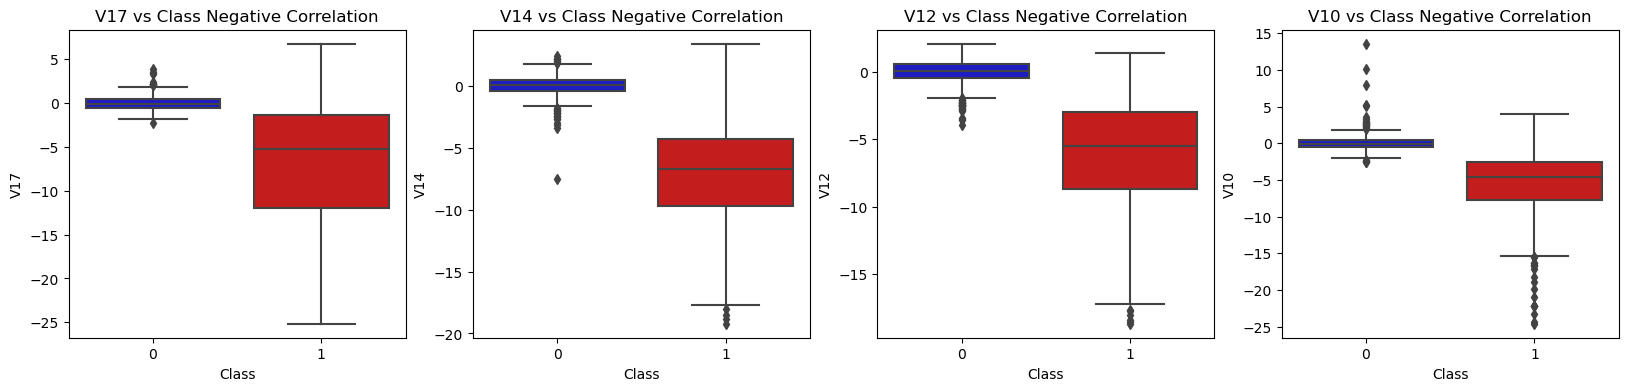

In [126]:
f, axes = plt.subplots(ncols= 4, figsize = (20, 4))

sns.boxplot(x='Class', y = 'V17', data= new_df, palette= colors, ax = axes[0])
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x='Class', y = 'V14', data= new_df, palette= colors, ax = axes[1])
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x='Class', y = 'V12', data= new_df, palette= colors, ax = axes[2])
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x='Class', y = 'V10', data= new_df, palette= colors, ax = axes[3])
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

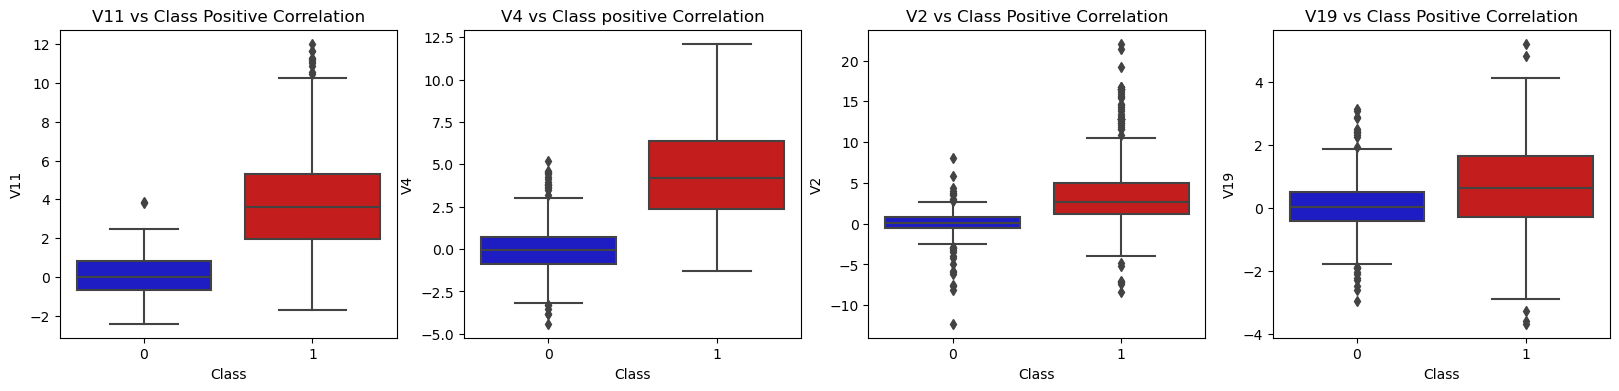

In [127]:
f, axes = plt.subplots(ncols= 4, figsize=(20, 4))

sns.boxplot(x='Class', y = 'V11', data= new_df, palette= colors, ax = axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x='Class', y = 'V4', data= new_df, palette= colors, ax = axes[1])
axes[1].set_title('V4 vs Class positive Correlation')

sns.boxplot(x='Class', y = 'V2', data= new_df, palette= colors, ax = axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')

sns.boxplot(x='Class', y = 'V19', data= new_df, palette= colors, ax = axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

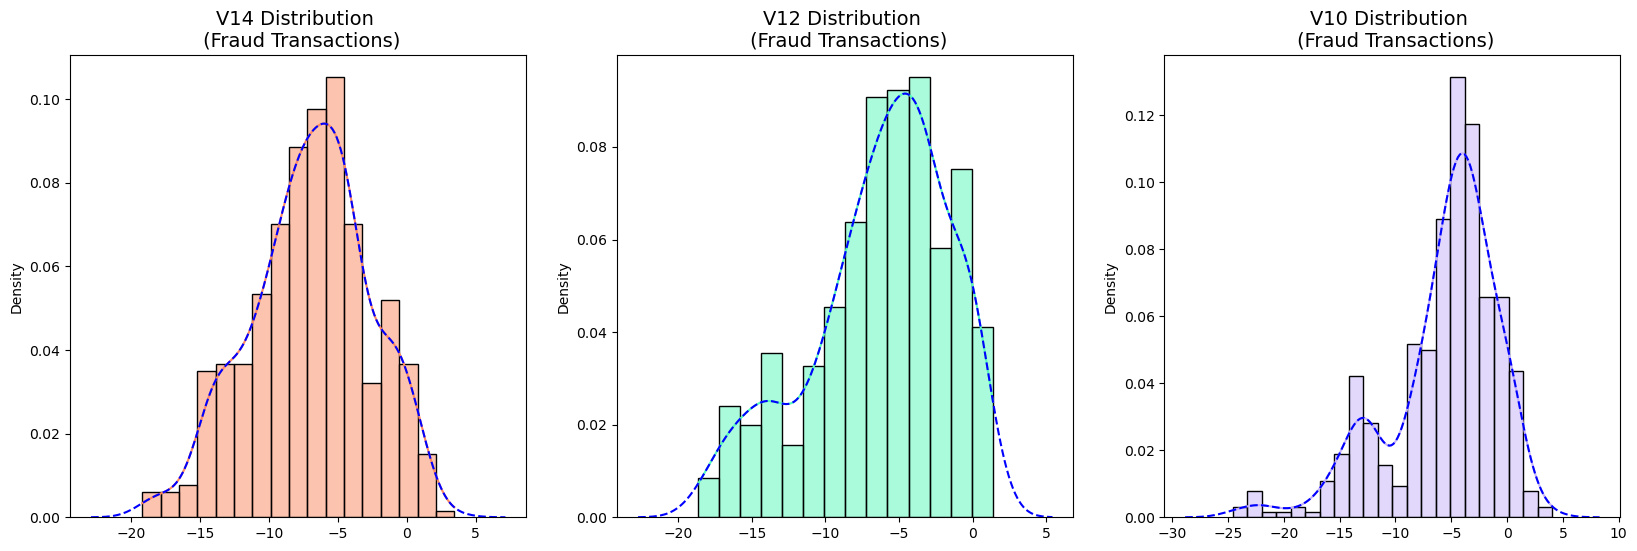

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

v14_fraud_dist = new_df['V14'].loc[new_df['Class'] == 1].values
sns.histplot(v14_fraud_dist, ax=ax1, kde=True, stat="density", color='#FB8861')
sns.kdeplot(v14_fraud_dist, ax=ax1, color='blue', linestyle='--')
ax1.set_title('V14 Distribution \n (Fraud Transactions)', fontsize=14)

v12_fraud_dist = new_df['V12'].loc[new_df['Class'] == 1].values
sns.histplot(v12_fraud_dist, ax=ax2, kde=True, stat="density", color='#56F9BB')
sns.kdeplot(v12_fraud_dist, ax=ax2, color='blue', linestyle='--')
ax2.set_title('V12 Distribution \n (Fraud Transactions)', fontsize=14)

v10_fraud_dist = new_df['V10'].loc[new_df['Class'] == 1].values
sns.histplot(v10_fraud_dist, ax=ax3, kde=True, stat="density", color='#C5B3F9')
sns.kdeplot(v10_fraud_dist, ax=ax3, color='blue', linestyle='--')
ax3.set_title('V10 Distribution \n (Fraud Transactions)', fontsize=14)

plt.show()


In [129]:

# Feature V14
v14_fraud = new_df['V14'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
print('Quartile 25:{} | Quartile 75:{}'.format(q25, q75))
v14_iqr = q75 - q25
print('IQR: {}'. format(v14_iqr))

v14_cut_off = v14_iqr * 1.5
v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
print('Cut Off:{}'.format(v14_cut_off))
print('V14_lower:{}'.format(v14_lower))
print('V14_upper:{}'.format(v14_upper))

outlier_v14 = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outlier_v14)))
print('V14 outliers:{}'.format(outlier_v14))

new_df = new_df.drop(new_df[(new_df['V14'] > v14_upper) | (new_df['V14'] < v14_lower)].index)
print('Number of Instances after outlier removal: {}'.format(len(new_df)))
print('-------' * 11)

# Feature V12
v12_fraud = new_df['V12'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
print('Quartile 25:{} | Quartile 75:{}'.format(q25, q75))
v12_iqr = q75 - q25
print('IQR: {}'. format(v12_iqr))

v12_cutoff = v12_iqr * 1.5
v12_lower, v12_upper = q25 - v12_cutoff, q75 + v12_cutoff
print('Cut Off:{}'.format(v12_cutoff))
print('V12_lower:{}'.format(v12_lower))
print('V12_upper:{}'.format(v12_upper))

outlier_v12 = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outlier_v12)))
print('V12 outliers:{}'.format(outlier_v12))

new_df = new_df.drop(new_df[(new_df['V12'] > v12_upper) | (new_df['V12'] < v12_lower)].index)
print('Number of Instances after outlier removal: {}'.format(len(new_df)))
print('---------' * 11)

# Feature V10
v10_fraud = new_df['V10'].loc[new_df['Class'] == 1].values
q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
print('Quartile 25:{} | Quartile 75:{}'.format(q25, q75))
v10_iqr = q75 - q25
print('IQR: {}'. format(v10_iqr))

v10_cut_off = v10_iqr * 1.5
v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
print('Cut Off:{}'.format(v10_cut_off))
print('V10_lower:{}'.format(v10_lower))
print('V10_upper:{}'.format(v10_upper))

outliers_v10 = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers_v10)))
print('V10 outliers:{}'.format(outliers_v10))

new_df = new_df.drop(new_df[(new_df['V10'] > v10_upper) | (new_df['V10'] < v10_lower)].index)
print('Number of Instances after outliers removal: {}'.format(len(new_df)))

Quartile 25:-9.692722964972386 | Quartile 75:-4.282820849486865
IQR: 5.409902115485521
Cut Off:8.114853173228282
V14_lower:-17.807576138200666
V14_upper:3.8320323237414167
Feature V14 Outliers for Fraud Cases: 4
V14 outliers:[-18.4937733551053, -19.2143254902614, -18.8220867423816, -18.0499976898594]
Number of Instances after outlier removal: 980
-----------------------------------------------------------------------------
Quartile 25:-8.67303320439115 | Quartile 75:-2.893030568676315
IQR: 5.780002635714835
Cut Off:8.670003953572252
V12_lower:-17.3430371579634
V12_upper:5.776973384895937
Feature V12 Outliers for Fraud Cases: 4
V12 outliers:[-18.4311310279993, -18.0475965708216, -18.5536970096458, -18.6837146333443]
Number of Instances after outlier removal: 976
---------------------------------------------------------------------------------------------------
Quartile 25:-7.466658535821847 | Quartile 75:-2.5118611381562523
IQR: 4.954797397665595
Cut Off:7.432196096498393
V10_lower:-14.

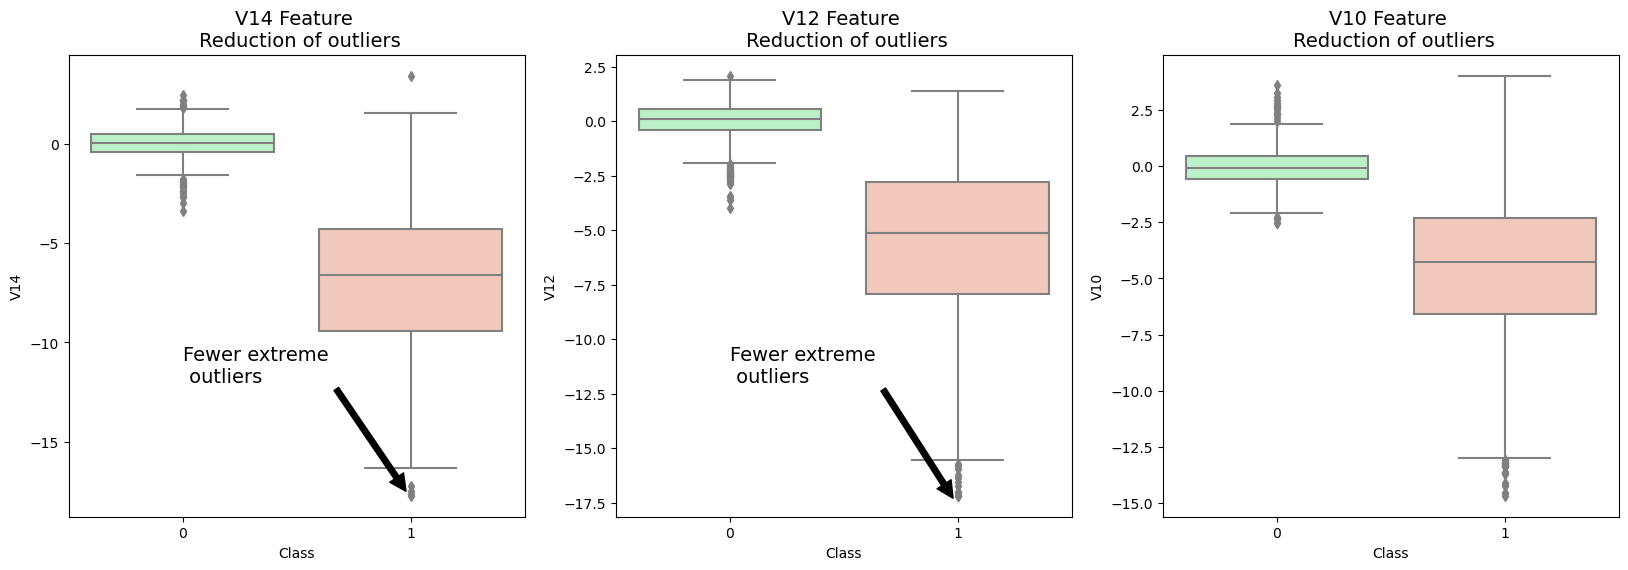

In [130]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed
# Feature V14
sns.boxplot(x="Class", y="V14", data=new_df,ax=ax1, palette=colors)
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=new_df, ax=ax2, palette=colors)
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=new_df, ax=ax3, palette=colors)
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

In [131]:
#Dimensionality Reduction and Clustering

X = new_df.drop('Class', axis = 1)
y = new_df['Class']

# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components= 2, random_state= 42).fit_transform(X.values)
t1 = time.time()
print('T-SNE too {:.2}s'.format(t1 - t0))

# PCA Implementation

t0= time.time()
X_reduced_pca = PCA(n_components= 2, random_state= 42).fit_transform(X.values)
t1 = time.time()
print('PCA took {:.2}s'.format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components= 2, algorithm= 'randomized', random_state= 42).fit_transform(X.values)
t1 = time.time()
print('Truncated SVD took {:.2}s'.format(t1 - t0))

T-SNE too 5.2s
PCA took 0.0065s
Truncated SVD took 0.005s


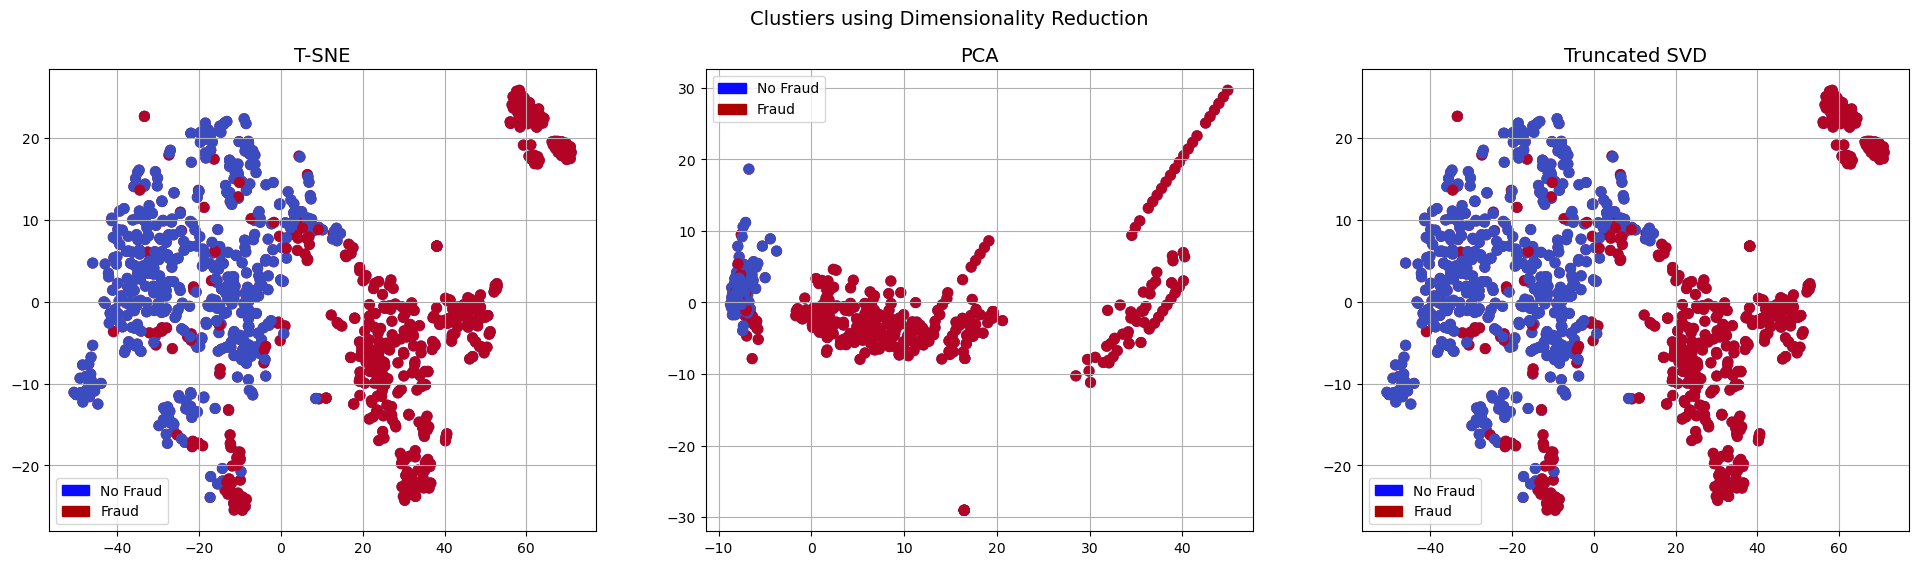

In [132]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize= (24, 6))

f.suptitle('Clustiers using Dimensionality Reduction', fontsize = 14)

blue_pathch = mpatches.Patch(color = '#0A0AFF', label = 'No Fraud')
red_patch = mpatches.Patch(color = '#AF0000', label = 'Fraud')

# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y==0), cmap = 'coolwarm',  label = 'No Fraud', linewidths= 2)
ax1.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y==1), cmap= 'coolwarm', label = 'Fraud', linewidths=2)
ax1.set_title('T-SNE', fontsize = 14)

ax1.grid(True)
ax1.legend(handles = [blue_pathch, red_patch])

# PCA scatter plot

ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(y== 0), cmap = 'coolwarm', label = 'No Fraud', linewidths = 2)
ax2.scatter(X_reduced_pca[:, 0], X_reduced_pca[:, 1], c=(y== 1), cmap = 'coolwarm', label = 'Fraud', linewidths = 2)
ax2.set_title('PCA', fontsize = 14)

ax2.grid(True)
ax2.legend(handles = [blue_pathch, red_patch])

# TruncatedSVD scatter plot

ax3.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y==0), cmap = 'coolwarm', label = 'No Fraud', linewidths= 2)
ax3.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=(y==1), cmap = 'coolwarm', label = 'Fraud', linewidths= 2)
ax3.set_title('Truncated SVD', fontsize = 14)

ax3.grid(True)

ax3.legend(handles = [blue_pathch, red_patch])

plt.show()

In [133]:
#classifier

X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [134]:
from sklearn.model_selection import train_test_split

X_trian, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [135]:
X_train = X_trian.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [136]:
classifiers = {
    'LogisticRegression': LogisticRegression(),
    "KNerarest" : KNeighborsClassifier(),
    'Support Vector Classifier': SVC(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

In [138]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv = 5)
    print('Classifiers:', classifier.__class__.__name__, 'Has a training score of', round(training_score.mean(), 2)* 100, '% accuracy score')

Classifiers: LogisticRegression Has a training score of 93.0 % accuracy score
Classifiers: KNeighborsClassifier Has a training score of 93.0 % accuracy score
Classifiers: SVC Has a training score of 93.0 % accuracy score
Classifiers: DecisionTreeClassifier Has a training score of 88.0 % accuracy score


In [140]:
from sklearn.model_selection import GridSearchCV

# Logistic Regression
log_reg_params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
grid_log_reg = GridSearchCV(LogisticRegression(solver='liblinear'), log_reg_params)
grid_log_reg.fit(X_train, y_train)
log_reg = grid_log_reg.best_estimator_

# KNeighbors
knears_params = {'n_neighbors': list(range(2, 5, 1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid_Knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_Knears.fit(X_train, y_train)
knears_neighbors = grid_Knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)
svc = grid_svc.best_estimator_

# DecisionTreeClassifier
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': list(range(2, 4, 1)), 'min_samples_leaf': list(range(5, 7, 1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)
tree_clf = grid_tree.best_estimator_

In [141]:
#Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv = 5)
print('Logestic Regression Cross Validation Score:', round(log_reg_score.mean() * 100, 2).astype(str) + "%")

knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv = 5)
print("Knears Neighbors Cross Val Score:", round(knears_score.mean() * 100, 2).astype(str) + "%")

svc_score = cross_val_score(svc, X_train, y_train, cv = 5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str)+'%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logestic Regression Cross Validation Score: 93.51%
Knears Neighbors Cross Val Score: 92.98%
Support Vector Classifier Cross Validation Score 93.51%
DecisionTree Classifier Cross Validation Score 91.26%


In [ ]:
undersample_X = df.drop('Class', axis = 1)
undersampel_y = df['Class']

for train_idx, test_idx  in sss.split(undersample_X, undersample_y):
    print('Train:', train_idx, 'Test:', test_idx)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_idx], undersample_X.iloc[test_idx]
    undersample_ytrain, undersmaple_ytest = undersample_y.iloc[train_idx], undersample_y.iloc[test_idx]

undersample_Xtrain = undersampel_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values

undersmample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc  = []

#Nearmiss Technique

